# **Load Data and Checking Information**

In [ ]:
# importing necessary libraries and loading the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
file_path = '/content/Fixed_cleaned_activities.csv'
athlete_data = pd.read_csv(file_path)

# Display First few Rows of Dataset
print("\nFirst few Rows of Dataset:\n")
print(athlete_data.head())


First few Rows of Dataset:

   Activity ID Activity Type   Begin Timestamp     End Timestamp  \
0   2284658991       Running   4/11/2017 12:07   4/11/2017 13:06   
1   2284658936       Running    3/11/2017 9:47   3/11/2017 10:35   
2   2228102647       Running  25/10/2017 16:31  25/10/2017 17:11   
3   2104984694       Running  13/10/2017 11:53  13/10/2017 12:41   
4   2084195352       Running   2/10/2017 14:51   2/10/2017 15:38   

   Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
0                 472.6            240.800003                 315.0   
1                 473.2            241.800003                 245.0   
2                 278.8            186.399994                 208.0   
3                 471.6            239.399994                 246.0   
4                 494.6            263.600006                 246.0   

   Elevation Loss (Raw)  Average Heart Rate (bpm)  Min. Heart Rate (bpm)  ...  \
0                 314.0                     182.0     



**- Imported essential libraries such as `pandas`, `matplotlib`, `numpy`, and `seaborn` for data analysis and visualization.**

**- Loaded the dataset `Fixed_cleaned_activities.csv` from the specified file path into a DataFrame named `athlete_data`.**

**- Displayed the first few rows of the dataset to get an overview of the structure and initial values of the data.**







# **Filter Columns (Metrics)**

In [ ]:
# selected columns from the dataset
selected_columns_final = [
    'Begin Timestamp',               # Start time of the activity
    'Moving Duration (seconds)',     # Proxy for time
    'Distance (Raw)',                # Total distance covered
    'Average Speed',                 # Average speed during the activity
    'Average Heart Rate (bpm)',      # Average heart rate
    'Calories',                      # Calories burned
    'Average Cadence'                # Average cadence
]

# Selecting only the relevant columns
filtered_metrics = athlete_data[selected_columns_final]

# Display the first few rows of the filtered dataset
print("\nFiltered dataset with selected metrics:")
filtered_metrics.head()



Filtered dataset with selected metrics:


,Begin Timestamp,Moving Duration (seconds),Distance (Raw),Average Speed,Average Heart Rate (bpm),Calories,Average Cadence
0,4/11/2017 12:07,3530,8.66881,8.845209,182.0,753,76.280294
1,3/11/2017 9:47,2882,7.62835,9.523810,177.0,626,79.153651
2,25/10/2017 16:31,2324,6.60755,10.227273,179.0,528,78.334207
3,13/10/2017 11:53,2877,7.75709,9.703504,180.0,661,78.191039
4,2/10/2017 14:51,2824,7.81321,9.972299,174.0,619,78.547063




**- Defined a list of selected columns (`selected_columns_final`) to focus on key metrics such as activity start time, distance, speed, heart rate, calories, and cadence.**

**- Created a new DataFrame (`filtered_metrics`) containing only these selected columns from the original dataset for subsequent analysis.**

**- Displayed the first few rows of the filtered dataset to check the selected metrics and understand the data structure.**

# **Descriptive Statistics**

In [ ]:
# descriptive statistics for the selected metrics
print("\nDescriptive statistics for the selected metrics:")
descriptive_stats = filtered_metrics.describe()
print(descriptive_stats)




Descriptive statistics for the selected metrics:
       Moving Duration (seconds)  Distance (Raw)  Average Speed  \
count               1.550000e+02      155.000000     155.000000   
mean                1.590367e+04       26.776991      10.264121   
std                 1.680284e+05      251.049566       1.157265   
min                 9.440000e+02        2.701190       4.215457   
25%                 1.603500e+03        5.016340       9.625737   
50%                 2.257000e+03        6.107940      10.198300   
75%                 2.897500e+03        7.773235      11.076923   
max                 2.094296e+06     3132.000000      12.500000   

       Average Heart Rate (bpm)     Calories  Average Cadence  
count                155.000000   155.000000       155.000000  
mean                 173.736981   523.625806        79.266212  
std                    5.796893   204.477038         1.674281  
min                  135.000000   224.000000        76.079365  
25%                  170.3

**- Generated descriptive statistics for the filtered dataset metrics using the `describe()` method, providing a summary of statistical measures.**

**- Displayed key information such as count, mean, standard deviation, minimum, and maximum values for each selected metric.**

**- These statistics offer insights into the distribution, central tendency, and variability of the metrics, aiding in better understanding of the dataset's characteristics.**

# **PART-A**

# **Trend of Time Over Other Metrics**

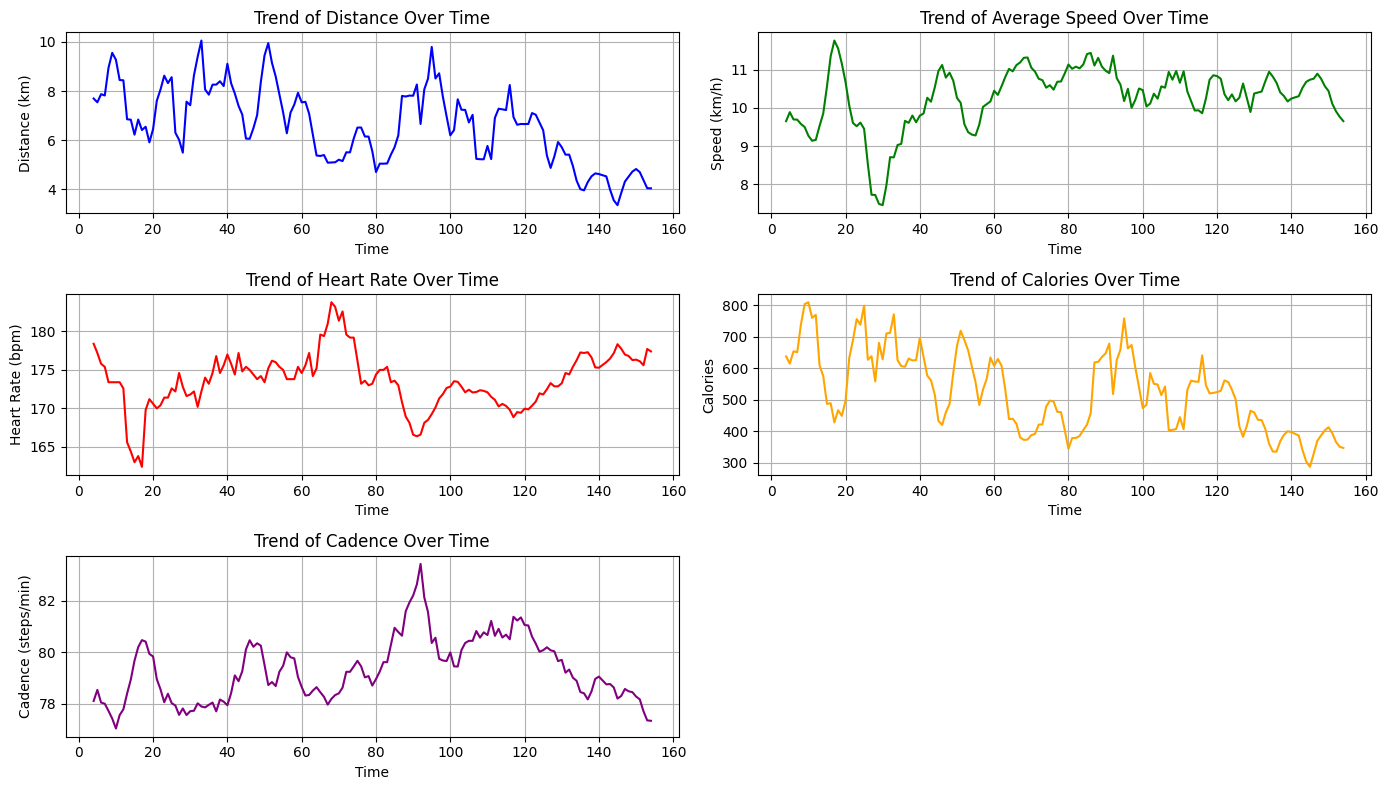

In [ ]:

filtered_metrics = filtered_metrics.copy()

# Handling outliers by removing extreme values

filtered_metrics = filtered_metrics[
    (filtered_metrics['Distance (Raw)'] < 50) &  # Distance below 50 km
    (filtered_metrics['Calories'] < 2000) &  # Calories below 2000
    (filtered_metrics['Average Speed'] < 15)  # Speed below 15 km/h
]

# Applying rolling averages to smooth trends
filtered_metrics['Distance (Rolling Avg)'] = filtered_metrics['Distance (Raw)'].rolling(window=5).mean()
filtered_metrics['Calories (Rolling Avg)'] = filtered_metrics['Calories'].rolling(window=5).mean()
filtered_metrics['Speed (Rolling Avg)'] = filtered_metrics['Average Speed'].rolling(window=5).mean()
filtered_metrics['Heart Rate (Rolling Avg)'] = filtered_metrics['Average Heart Rate (bpm)'].rolling(window=5).mean()
filtered_metrics['Cadence (Rolling Avg)'] = filtered_metrics['Average Cadence'].rolling(window=5).mean()

# Plotting trends
plt.figure(figsize=(14, 8))

# Distance vs Time
plt.subplot(3, 2, 1)
plt.plot(filtered_metrics.index, filtered_metrics['Distance (Rolling Avg)'], color='blue')
plt.title('Trend of Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid()

# Speed vs Time
plt.subplot(3, 2, 2)
plt.plot(filtered_metrics.index, filtered_metrics['Speed (Rolling Avg)'], color='green')
plt.title('Trend of Average Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.grid()

# Heart Rate vs Time
plt.subplot(3, 2, 3)
plt.plot(filtered_metrics.index, filtered_metrics['Heart Rate (Rolling Avg)'], color='red')
plt.title('Trend of Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.grid()

# Calories vs Time
plt.subplot(3, 2, 4)
plt.plot(filtered_metrics.index, filtered_metrics['Calories (Rolling Avg)'], color='orange')
plt.title('Trend of Calories Over Time')
plt.xlabel('Time')
plt.ylabel('Calories')
plt.grid()

# Cadence vs Time
plt.subplot(3, 2, 5)
plt.plot(filtered_metrics.index, filtered_metrics['Cadence (Rolling Avg)'], color='purple')
plt.title('Trend of Cadence Over Time')
plt.xlabel('Time')
plt.ylabel('Cadence (steps/min)')
plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()




### **Trend of Metrics Over Time**
- **Objective**: To visualize trends over time for key metrics such as distance, speed, heart rate, calories, and cadence.
- **Data Processing**:
  - **Outlier Removal**: Removed extreme values for `Distance`, `Calories`, and `Average Speed` to reduce skewness and improve trend accuracy.
  - **Smoothing Trends**: Applied rolling averages with a window of 5 to smooth the values and reduce noise in the data.
-**Trends/Patterns Observed in the Plots**
  1. **Distance Over Time**:
   - There is considerable fluctuation in the distances covered, indicating variability in the athlete's training intensity or session type.
   - Notably, the average distance tends to drop around the latter part of the timeline, suggesting reduced training volume, possibly due to rest periods or a change in training focus.

  2. **Average Speed Over Time**:
   - The speed generally remains steady with visible peaks, implying a relatively consistent pace with occasional speed-focused sessions.
   - Peaks in speed are fewer and distinct, indicating that high-speed efforts were not the norm, but rather specific training points.

 3. **Heart Rate Over Time**:
   - The heart rate starts relatively lower but increases and stays consistently higher later on, which may suggest either improvement in intensity or adaptation to a more challenging training regimen.
   - Spikes in heart rate seem to align with potential high-speed or long-duration efforts, possibly during interval training sessions.

 4. **Calories Over Time**:
   - The calories burned show a close relationship with both distance and intensity, indicated by peaks during longer or more intense sessions.
   - The trend shows an overall reduction towards the end, suggesting that training has become lighter or that the athlete is engaging in shorter duration workouts.

 5. **Cadence Over Time**:
   - The cadence follows a stable pattern with minor fluctuations, gradually increasing at some points before declining towards the end, suggesting a drop in effort or fatigue.
   - Higher cadence moments likely reflect shorter, fast-paced sessions, while lower cadence periods might indicate longer endurance sessions or fatigue setting in during long runs.



# **Trend of Distance over other Metrics**

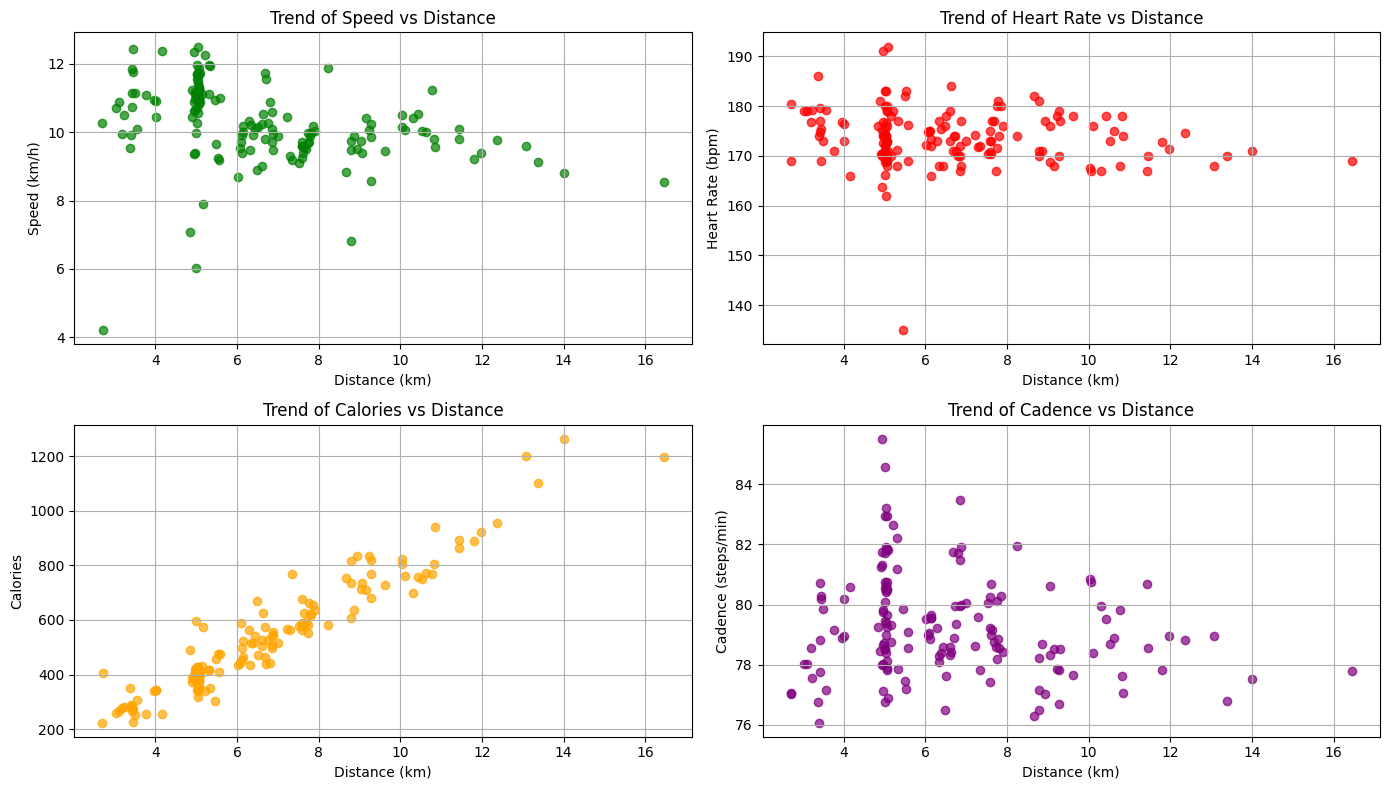

In [ ]:
# Plotting trends over distance
plt.figure(figsize=(14, 8))

# Speed vs Distance
plt.subplot(2, 2, 1)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Speed'], color='green', alpha=0.7)
plt.title('Trend of Speed vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Speed (km/h)')
plt.grid()

# Heart Rate vs Distance
plt.subplot(2, 2, 2)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Heart Rate (bpm)'], color='red', alpha=0.7)
plt.title('Trend of Heart Rate vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate (bpm)')
plt.grid()

# Calories vs Distance
plt.subplot(2, 2, 3)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Calories'], color='orange', alpha=0.7)
plt.title('Trend of Calories vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Calories')
plt.grid()

# Cadence vs Distance
plt.subplot(2, 2, 4)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Cadence'], color='purple', alpha=0.7)
plt.title('Trend of Cadence vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Cadence (steps/min)')
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




## **Trend of Distance Over Other Metrics**
- **Objective**: To examine how various metrics such as speed, heart rate, calories burned, and cadence relate to the distance covered by the athlete.

### Patterns/Trends Observed in Each Plot
1. **Speed vs Distance**:
   - Most runs are concentrated in the 6-10 km distance range with average speeds typically around 10 km/h.
   - There is no clear trend showing a significant increase or decrease in speed as distance changes, suggesting that speed is relatively consistent regardless of the run's length.

2. **Heart Rate vs Distance**:
   - The heart rate tends to cluster around 170-180 bpm across different distances, implying that the athlete maintains a similar effort level regardless of the distance.
   - A few data points with lower heart rates at shorter distances might indicate either light training or warm-up sessions.

3. **Calories vs Distance**:
   - A clear positive trend shows as the distance increases, the calories burned also increase linearly.
   - This straightforward trend indicates that the calorie expenditure is directly proportional to the running distance, which is expected as longer workouts naturally burn more calories.

4. **Cadence vs Distance**:
   - Cadence is mostly scattered between 78 to 82 steps/min across all distances, indicating a fairly stable stride rate during different run lengths.
   - Slight variation is visible, but the overall pattern suggests cadence doesn’t vary significantly with distance, hinting at the athlete’s consistent running rhythm.



# **Correlation Matrix Calculation For Relation Between the Variables**


Correlation Matrix:
                          Distance (Raw)  Average Speed  \
Distance (Raw)                  1.000000      -0.332136   
Average Speed                  -0.332136       1.000000   
Average Heart Rate (bpm)       -0.149645      -0.038291   
Calories                        0.957144      -0.476659   
Average Cadence                -0.175064       0.533863   

                          Average Heart Rate (bpm)  Calories  Average Cadence  
Distance (Raw)                           -0.149645  0.957144        -0.175064  
Average Speed                            -0.038291 -0.476659         0.533863  
Average Heart Rate (bpm)                  1.000000 -0.074358        -0.445623  
Calories                                 -0.074358  1.000000        -0.277209  
Average Cadence                          -0.445623 -0.277209         1.000000  


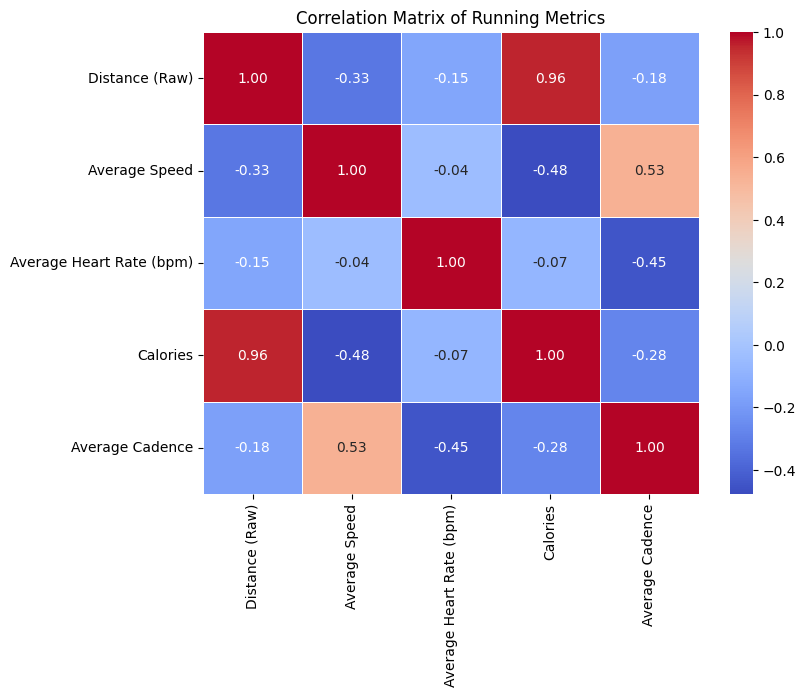

In [ ]:
# Calculating the correlation matrix for the relevant metrics
correlation_matrix_metrics = filtered_metrics[['Distance (Raw)',
                                       'Average Speed',
                                       'Average Heart Rate (bpm)',
                                       'Calories',
                                       'Average Cadence']].corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix_metrics)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Running Metrics')
plt.show()




## **Correlation Matrix Calculation Between Running Metrics**
- **Objective**: To determine the strength and direction of relationships between key metrics such as distance, speed, heart rate, calories, and cadence.
- **Data Processing**:
  - Calculated the correlation matrix for selected metrics to quantify their interrelationships.
  - Visualized the correlation matrix using a heatmap to provide a more intuitive understanding of how each metric relates to others.
- **Key Observations**:
  - **Distance and Calories**: Strong positive correlation (`0.96`), indicating that as the running distance increases, calorie expenditure also consistently increases.
  - **Average Speed and Cadence**: Moderate positive correlation (`0.53`), suggesting higher cadence is often associated with higher average speed.
  - **Average Heart Rate and Cadence**: Moderate negative correlation (`-0.45`), implying that higher heart rates are generally associated with lower cadence.
- Overall, The correlation matrix reveals that distance is a primary driver for calories burned, while cadence has a mixed relationship with other metrics like speed and heart rate, highlighting different physiological responses during training.

# **PART-B**

# **Regression Analysis to predict calories burned based on other metrics ( distance, speed, and heart rate)**

## Feature Selection, Splitting Train & Test data

In [ ]:
# Import necessary libraries for regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features (independent variables) and target (dependent variable)
X = filtered_metrics[['Distance (Raw)', 'Average Speed', 'Average Heart Rate (bpm)']]
y = filtered_metrics['Calories']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing datasets
print("Training data (features):", X_train.shape)
print("Testing data (features):", X_test.shape)


Training data (features): (123, 3)
Testing data (features): (31, 3)


## Model Training

In [ ]:
# Creating an instance of the Linear Regression model
regressor = LinearRegression()

# Training the model on the training data
regressor.fit(X_train, y_train)

# Displaying the coefficients of the model
print("\nModel Coefficients:")
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)



Model Coefficients:
Intercept: -59.49732307224065
Coefficients: [ 75.46342278 -29.44255466   2.23511193]


## Evaluation, Displaying Models's Performance and Comparing Actual & Predicted Values

In [ ]:
# Making predictions on the testing set
y_pred_cal = regressor.predict(X_test)

# Evaluating the model's performance
mse_cal = mean_squared_error(y_test, y_pred_cal)
r2_cal = r2_score(y_test, y_pred_cal)

# Displaying the evaluation metrics
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse_cal)
print("R-squared (R²):", r2_cal)

# Comparing actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_cal})
print("\nComparison of Actual vs Predicted Calories:")
print(comparison.head(15))



Model Evaluation:
Mean Squared Error (MSE): 1553.919002478964
R-squared (R²): 0.9705778650967594

Comparison of Actual vs Predicted Calories:
     Actual   Predicted
15      226  212.927110
94      712  713.920335
153     351  330.217676
105     394  376.266311
109     400  352.749874
65      387  419.202855
18      498  495.494401
45      339  373.513301
36      806  865.474457
55      515  564.005264
85      340  341.343836
143     343  316.448033
19      678  632.948126
148     428  408.439349
86      710  700.515305


## Visualizing Predicted vs Actual Values and Prediction Residuals

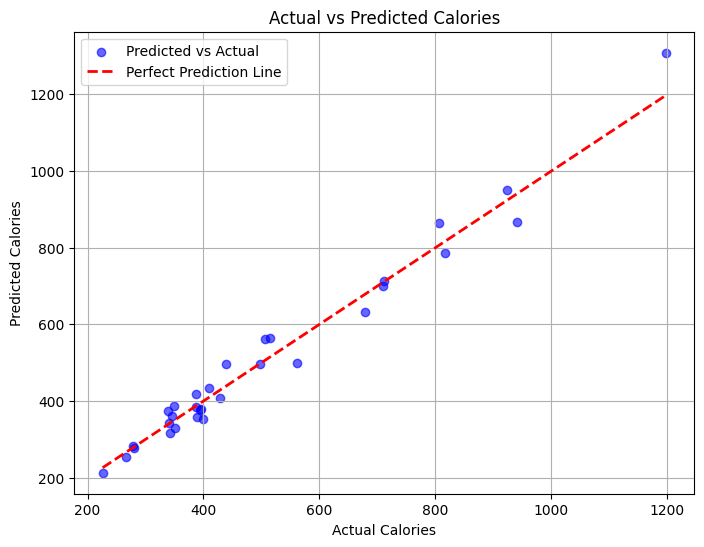

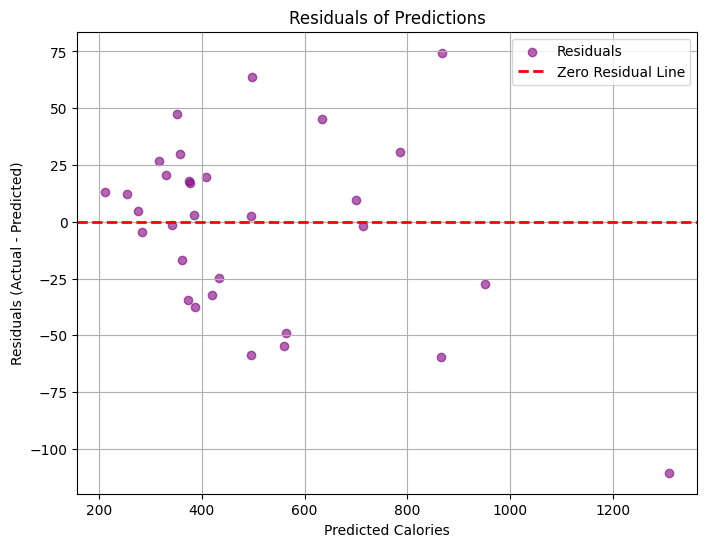

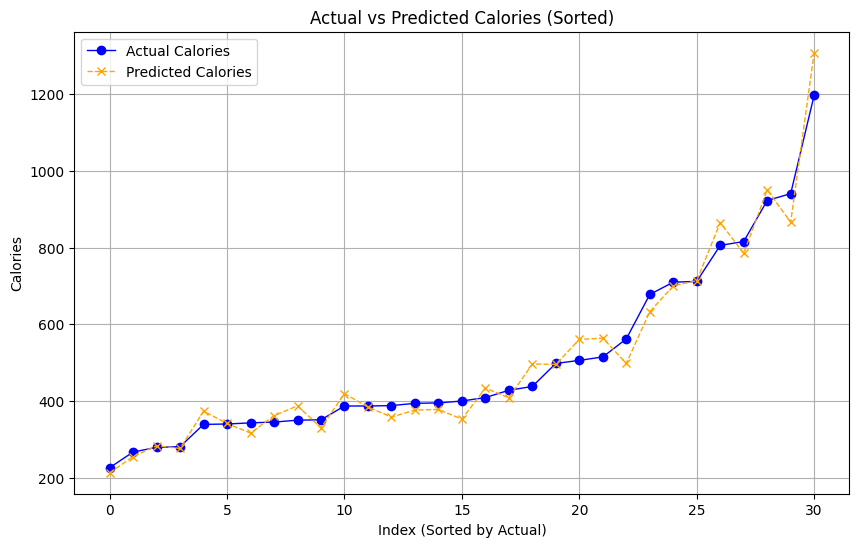

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cal, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.grid()
plt.show()

# Residual plot
residuals = y_test - y_pred_cal
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cal, residuals, color='purple', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid()
plt.show()

# Line plot of actual vs predicted values (sorted for visualization)
comparison_sorted = comparison.sort_values(by='Actual')
plt.figure(figsize=(10, 6))
plt.plot(comparison_sorted['Actual'].values, label='Actual Calories', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(comparison_sorted['Predicted'].values, label='Predicted Calories', color='orange', marker='x', linestyle='--', linewidth=1)
plt.title('Actual vs Predicted Calories (Sorted)')
plt.xlabel('Index (Sorted by Actual)')
plt.ylabel('Calories')
plt.legend()
plt.grid()
plt.show()



## **Regression Analysis to Predict Calories Burned**
- **Objective**: The primary goal of this analysis is to develop a predictive model that estimates the calories burned by an athlete based on metrics like distance, speed, and heart rate.
- **Use of Regression Analysis**: Regression analysis helps quantify relationships between the independent variables (features like distance, speed, heart rate) and the dependent variable (calories burned). This type of analysis is commonly used for predictive modeling to understand the contribution of various factors.

### Steps
1. **Feature Selection and Data Splitting**:
   - Selected relevant features: `Distance`, `Average Speed`, and `Average Heart Rate`.
   - Split the dataset into training (80%) and testing sets (20%) to build and evaluate the model.
2. **Model Training**:
   - Used a Linear Regression model, which was trained on the training data to establish a relationship between features and target.
   - Displayed the model’s coefficients to understand the influence of each metric on calories burned.
3. **Model Evaluation**:
   - Evaluated model performance using `Mean Squared Error (MSE)` and `R-squared (R²)` metrics. An `R²` value of approximately `0.97` indicates the model explains about 97% of the variance in calories burned, suggesting a strong fit.
   - Compared actual vs predicted values for the test set to assess the prediction quality.

### Findings, Patterns, and Insights from Plots
1. **Actual vs Predicted Calories Scatter Plot**:
   - The scatter plot with a dashed red line representing a perfect prediction indicates that most points fall close to this line, meaning the model is generally accurate.
   - The close clustering of points around the line implies minimal error in prediction, although there are a few outliers, indicating some instances where the model's accuracy decreases.
  
2. **Residuals of Predictions**:
   - The residuals plot shows the difference between actual and predicted calories.
   - Most residuals are distributed around zero, implying that the model does not have significant bias, although a few points have larger residuals, especially for higher calorie values, indicating under- or over-predictions in these instances.
   - The absence of a clear pattern in the residuals suggests that the model's errors are random, which is a good indication that the linear regression model is appropriate for the data.

3. **Actual vs Predicted Calories Line Plot (Sorted)**:
   - The line plot of sorted actual vs predicted values provides a detailed comparison of the trend in calorie predictions.
   - Predicted values closely follow the actual values, with some minor deviations, especially at extreme calorie counts.
   - The model’s accuracy is higher for lower and medium ranges of calorie burns, while slight discrepancies are observed for the highest values.

### Overall
- **Strong Model Fit**: The high R² value indicates the model effectively captures the relationship between distance, speed, and heart rate in predicting calories.
- **Consistent Prediction for Most Values**: The scatter and line plots show that the majority of predictions align well with actual values, especially in the typical workout range.
- **Model Limitations**: Some over- and under-predictions, seen in the residuals plot, suggest that the model might not fully capture non-linear relationships or unusual workout scenarios.



 # **Random Forest Regression of advanced modeling to predict distance based on other metrics.**

## Feature Selection, Splitting Train & Test Data, Train the Model, Evaluating Model's Performance

In [ ]:
# Import necessary libraries for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features (independent variables) and target (dependent variable)
X_rf = filtered_metrics[['Calories', 'Average Speed', 'Average Cadence']]
y_rf = filtered_metrics['Distance (Raw)']

# Splitting the data into training and testing sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Creating an instance of the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_regressor.fit(X_rf_train, y_rf_train)

# Making predictions on the testing set
y_rf_pred = rf_regressor.predict(X_rf_test)

# Evaluating the model's performance
mse_rf = mean_squared_error(y_rf_test, y_rf_pred)
r2_rf = r2_score(y_rf_test, y_rf_pred)

# Displaying the evaluation metrics
print("\nRandom Forest Regression - Model Performance for Predicting Distance:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²):", r2_rf)

# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': X_rf.columns, 'Importance': rf_regressor.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))



Random Forest Regression - Model Performance for Predicting Distance:
Mean Squared Error (MSE): 0.607385341441271
R-squared (R²): 0.9303127345618221

Feature Importance:
           Feature  Importance
0         Calories    0.940350
1    Average Speed    0.030499
2  Average Cadence    0.029151


## Visualization Of Model's Performance


Comparison of Actual vs Predicted Distances:
     Actual Distance  Predicted Distance
15           3.44782            3.496354
94           9.04333            9.810879
153          3.37103            3.938388
105          5.04014            5.035411
109          5.02340            5.071933
65           4.96855            4.012520
18           6.12939            6.274888
45           5.21374            4.584239
36          10.81228            9.296810
55           6.99701            6.610625
85           5.03507            4.583392
143          4.01373            4.348510
19           7.59412            8.019637
148          5.00634            5.098377
86           9.15480            9.953557


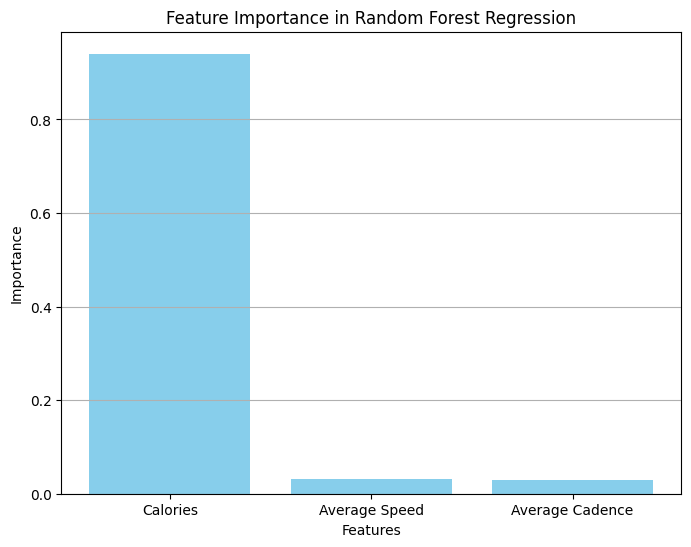

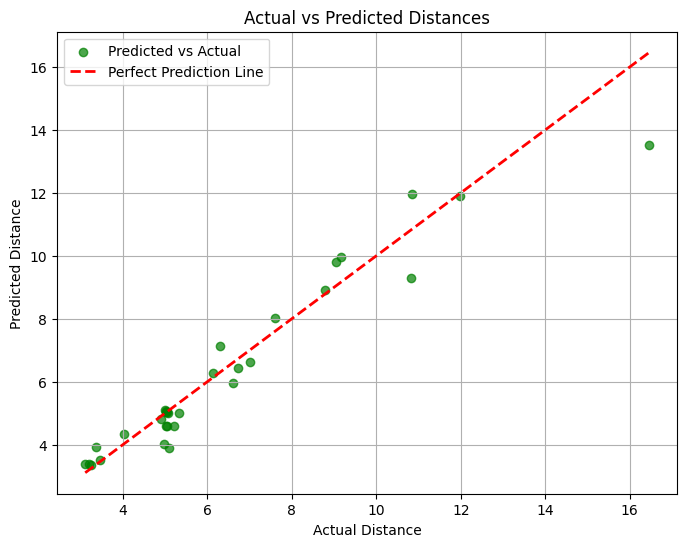

In [ ]:
import matplotlib.pyplot as plt

# Creating a DataFrame to compare actual and predicted distances
distance_comparison = pd.DataFrame({'Actual Distance': y_rf_test, 'Predicted Distance': y_rf_pred})

# Displaying the first 15 rows
print("\nComparison of Actual vs Predicted Distances:")
print(distance_comparison.head(15))

# Feature Importance Visualization
plt.figure(figsize=(8, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(axis='y')
plt.show()

# Scatter Plot of Actual vs Predicted Distances
plt.figure(figsize=(8, 6))
plt.scatter(y_rf_test, y_rf_pred, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot([y_rf_test.min(), y_rf_test.max()], [y_rf_test.min(), y_rf_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Distances')
plt.xlabel('Actual Distance')
plt.ylabel('Predicted Distance')
plt.legend()
plt.grid()
plt.show()







## **Random Forest Regression to Predict Distance Based on Other Metrics**
- **Objective**: To build a predictive model that estimates the distance covered during workouts based on metrics like calories burned, average speed, and cadence.
- **Use of Random Forest Regression**: Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It is well-suited for capturing non-linear relationships in complex data and often provides better accuracy compared to simple linear regression models.

### Steps
1. **Feature Selection and Data Splitting**:
   - Selected features included `Calories`, `Average Speed`, and `Average Cadence` to predict `Distance`.
   - The dataset was split into training (80%) and testing (20%) sets to train the model and evaluate its performance on unseen data.
2. **Model Training with Random Forest**:
   - Trained a Random Forest Regressor with 100 decision trees to predict the distance.
   - Displayed feature importance to understand the contribution of each metric in predicting the distance.
3. **Model Evaluation**:
   - Calculated the `Mean Squared Error (MSE)` and `R-squared (R²)` scores to evaluate the model. An `R²` value of approximately `0.93` indicates a strong fit, implying that the model successfully explains about 93% of the variance in the distances.
   - Displayed a comparison between actual and predicted distances to assess the model’s accuracy.

### Findings, Patterns, and Insights from Plots
1. **Feature Importance Plot**:
   - The feature importance chart shows that `Calories` has the highest impact on predicting distance, with an importance score of `0.94`.
   - `Average Speed` and `Average Cadence` have significantly lower importance scores, indicating that they contribute only minimally to predicting distance compared to calories.
   - This highlights that the calorie expenditure, which itself is influenced by multiple factors like duration and intensity, is a strong predictor for estimating the distance covered during workouts.

2. **Actual vs Predicted Distances Scatter Plot**:
   - The scatter plot of actual vs predicted distances shows most data points close to the perfect prediction line, indicating the model's good accuracy.
   - There are a few data points, especially for higher distances, that are farther away from the perfect prediction line, which suggests that the model struggles a bit with accurately predicting very long distances.
   - Overall, the model captures the general trend, but outliers exist for some long-distance values, possibly indicating either data noise or a limitation of the model's ability to capture very high values accurately.

### Overall
- **Model Accuracy**: The Random Forest model performed well in predicting the distance, achieving a high R² score. This means that the model was able to explain most of the variance in distance using the selected features.
- **Dominant Feature**: The `Calories` metric had an overwhelming influence on predicting the distance, which implies that calorie expenditure serves as an effective proxy for distance. This makes intuitive sense since calories are generally proportional to both distance and effort.



# **Clustering analysis**

## Feature Selection, Clusters, Fitting Model, and Calculation of Clustering


Cluster Labels Assigned to Runs:
   Average Speed  Average Heart Rate (bpm)  Average Cadence  Cluster
0       8.845209                     182.0        76.280294        0
1       9.523810                     177.0        79.153651        0
2      10.227273                     179.0        78.334207        0
3       9.703504                     180.0        78.191039        0
4       9.972299                     174.0        78.547063        0

Cluster-Wise Summary of Metrics:
         Average Speed  Average Heart Rate (bpm)  Average Cadence
Cluster                                                          
0            10.160708                178.405878        78.144682
1             9.481082                169.790939        79.074628
2            11.404197                171.315904        81.286030


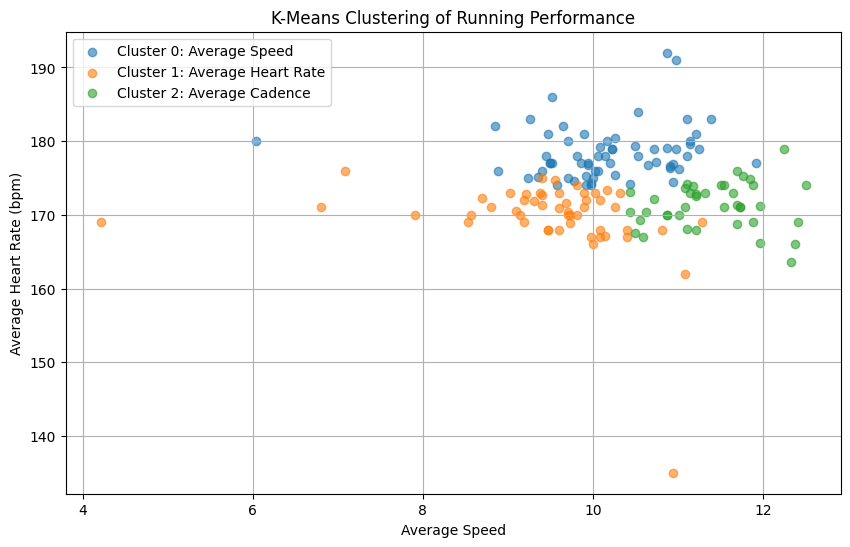

In [ ]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting features for clustering
clustering_features = filtered_metrics[['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Choosing the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the K-Means model
kmeans.fit(clustering_features_scaled)

# Adding cluster labels to the original dataset
filtered_metrics['Cluster'] = kmeans.labels_

# Displaying the first few rows with cluster labels
print("\nCluster Labels Assigned to Runs:")
print(filtered_metrics[['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence', 'Cluster']].head())

# Calculating the average metrics for each cluster
cluster_summary = filtered_metrics.groupby('Cluster')[['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence']].mean()

# Displaying the cluster-wise averages
print("\nCluster-Wise Summary of Metrics:")
print(cluster_summary)


# Visualizing the clusters with meaningful labels
plt.figure(figsize=(10, 6))

# Adding labels
labels = ['Cluster 0: Average Speed', 'Cluster 1: Average Heart Rate', 'Cluster 2: Average Cadence']

for cluster in range(3):
    cluster_data = filtered_metrics[filtered_metrics['Cluster'] == cluster]
    plt.scatter(cluster_data['Average Speed'], cluster_data['Average Heart Rate (bpm)'], label=labels[cluster], alpha=0.6)

plt.title('K-Means Clustering of Running Performance')
plt.xlabel('Average Speed')
plt.ylabel('Average Heart Rate (bpm)')
plt.legend()
plt.grid()
plt.show()





## Visualization of Cluster distributions by Each Metrics

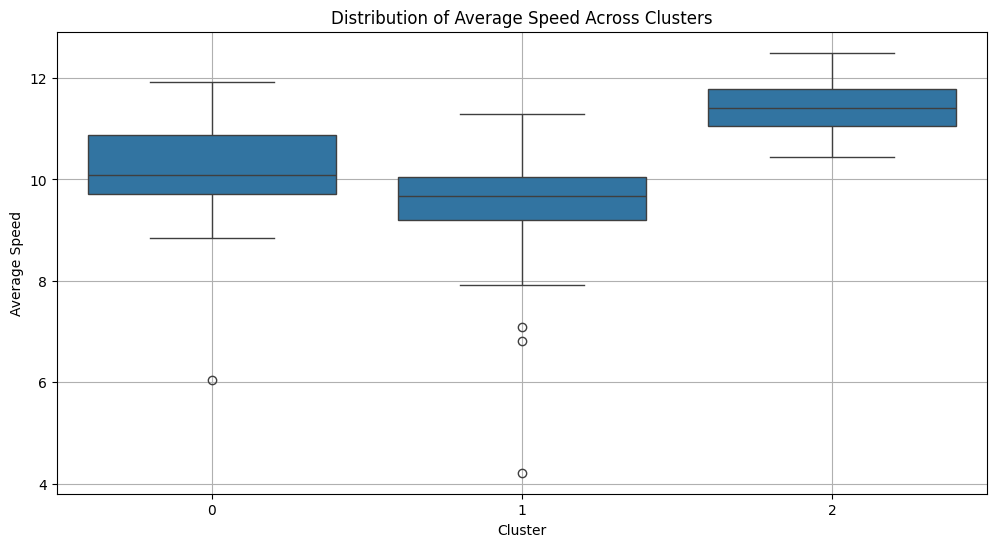

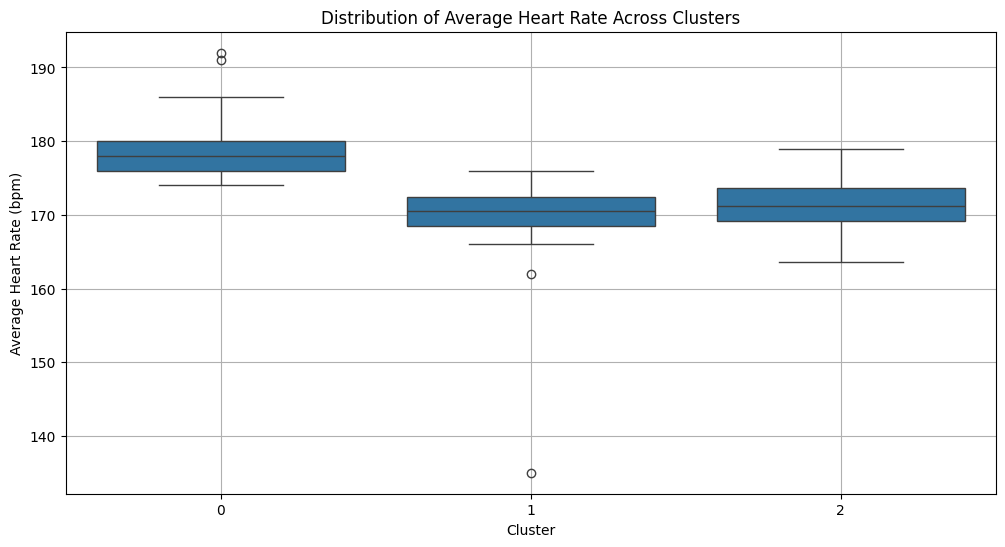

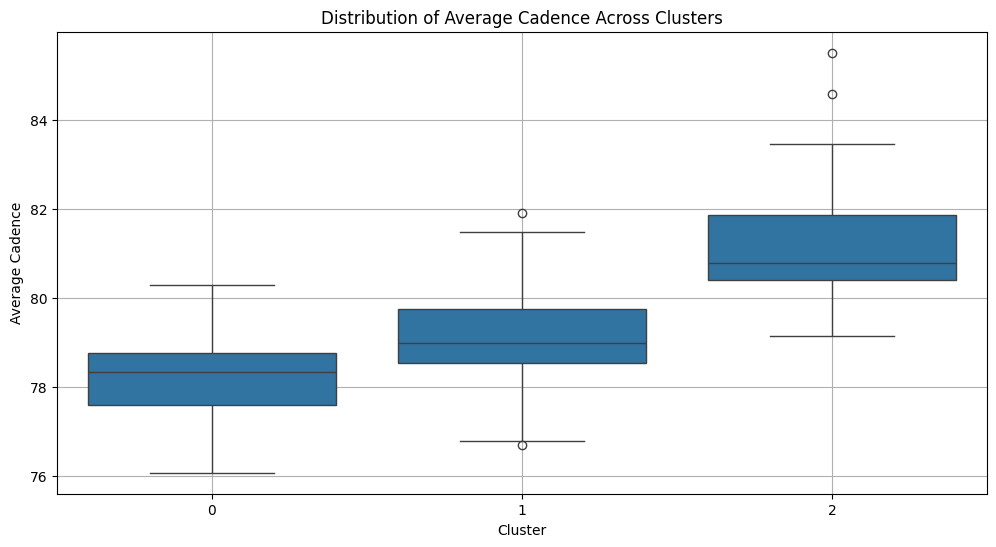

In [ ]:
# Boxplot for Average Speed by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Average Speed', data=filtered_metrics)
plt.title('Distribution of Average Speed Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Speed')
plt.grid()
plt.show()

# Boxplot for Average Heart Rate by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Average Heart Rate (bpm)', data=filtered_metrics)
plt.title('Distribution of Average Heart Rate Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid()
plt.show()

# Boxplot for Average Cadence by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Average Cadence', data=filtered_metrics)
plt.title('Distribution of Average Cadence Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Cadence')
plt.grid()
plt.show()




## **K-Means Clustering Analysis of Running Performance**
- **Objective**: To identify patterns in running performance by grouping similar runs based on metrics such as `Average Speed`, `Average Heart Rate`, and `Average Cadence`. Clustering helps in segmenting similar running sessions and understanding the athlete's training patterns.
- **Use of Clustering Analysis**: Clustering is a form of unsupervised learning that groups similar data points together without predefined labels. It is useful for identifying sub-groups or patterns within data, especially in understanding different levels or styles of performance, such as distinct intensities in workout sessions.

### Steps
1. **Feature Selection and Data Preprocessing**:
   - Selected the features: `Average Speed`, `Average Heart Rate`, and `Average Cadence` for clustering.
   - Standardized the features using `StandardScaler` to ensure that all metrics are on the same scale, which is critical for distance-based clustering algorithms like K-Means.
2. **Model Training with K-Means**:
   - Applied the `K-Means` algorithm with 3 clusters. The choice of 3 clusters aims to capture different types of training sessions or performance levels.
   - Fitted the K-Means model to the standardized data and assigned cluster labels to each running session, thereby grouping similar runs.
3. **Cluster Analysis**:
   - Added the cluster labels to the dataset, allowing for further analysis of how different runs are grouped.
   - Calculated the average values of each metric (`Average Speed`, `Average Heart Rate`, `Average Cadence`) for each cluster to summarize their characteristics.

### Findings, Patterns, and Insights from Plots
1. **K-Means Clustering Scatter Plot**:
   - The scatter plot visualizes the 3 clusters based on `Average Speed` and `Average Heart Rate`.
   - **Cluster 0** (Blue): Generally characterized by higher heart rates and moderate speed, indicating intense workout sessions with a focus on endurance.
   - **Cluster 1** (Orange): Shows lower heart rates and moderate speed, suggesting either recovery sessions or less intense endurance runs.
   - **Cluster 2** (Green): Demonstrates higher average speeds with slightly lower heart rates compared to Cluster 0, indicating faster runs but with controlled effort, likely focusing on speed.

2. **Distribution of Average Speed Across Clusters** :
   - **Cluster 0**: The median speed is around 10 km/h with some variability, indicating a mix of moderate-speed sessions.
   - **Cluster 1**: The average speed is slightly lower, with a few outliers on the lower end, suggesting this cluster includes slower, perhaps recovery-oriented runs.
   - **Cluster 2**: The median speed is higher, around 11-12 km/h, with less variability, indicating consistent, high-speed training sessions.

3. **Distribution of Average Heart Rate Across Clusters** :
   - **Cluster 0**: Shows higher average heart rates, centered around 180 bpm, suggesting these are the most intense sessions.
   - **Cluster 1**: Exhibits significantly lower heart rates, around 170 bpm, indicating lower-intensity or recovery runs.
   - **Cluster 2**: Displays a moderate range of heart rates, slightly lower than Cluster 0, pointing to fast runs that maintain a steady but not maximal effort.

4. **Distribution of Average Cadence Across Clusters** :
   - **Cluster 0**: Cadence is the lowest, around 78 steps per minute, possibly indicating either longer stride lengths or fatigue in intense sessions.
   - **Cluster 1**: Displays moderate cadence values, slightly below Cluster 2, aligning with the cluster's lower intensity.
   - **Cluster 2**: The highest cadence values, around 81-82 steps per minute, implying a more efficient running form at higher speeds, likely due to focusing on speed work.

### Overall
- **Cluster Differentiation**: The clustering successfully categorized the runs into distinct groups:
  - **Cluster 0** captures high heart rate, moderate speed, and lower cadence sessions—likely representing high-intensity endurance runs.
  - **Cluster 1** represents lower heart rate, moderate speed, and moderate cadence sessions, which are indicative of recovery or base-building runs.
  - **Cluster 2** indicates higher speed, lower heart rate, and higher cadence, suggesting fast but controlled effort runs, possibly aimed at improving pace.
  
- **Training Pattern Identification**: This clustering analysis reveals distinct types of runs in the athlete's training regimen, such as endurance-focused, speed-focused, and recovery sessions. By understanding these clusters, the athlete can ensure a balanced training approach covering various intensity levels.

- **Potential Areas of Focus**:
  - **High Heart Rate Sessions (Cluster 0)**: The high heart rate and moderate cadence suggest intense workouts. The athlete might consider strategies to either reduce heart rate through better aerobic conditioning or maintain this effort if the goal is cardiovascular improvement.
  - **Recovery Runs (Cluster 1)**: Lower heart rates and moderate speed are consistent with recovery. The athlete appears to be incorporating adequate lower-intensity training, which is beneficial for preventing overtraining.
  - **Speed Work (Cluster 2)**: High cadence and speed indicate effective speed-focused sessions. To further improve efficiency, the athlete could work on maintaining this high cadence with increasing distance.


# **Support Vector Regression (SVR) for Predicting Calories**

## Feature Selection, Split Train & Test Data, Train the Model, and Display and Visualizing Model Performance


SVR Model Evaluation:
Mean Squared Error (MSE): 6324.36952613784
R-squared (R²): 0.880253441087261

Comparison of Actual vs Predicted Calories:
     Actual   Predicted
15      226  319.864501
94      712  699.625259
153     351  354.222191
105     394  386.980226
109     400  385.946329
65      387  395.981148
18      498  482.907226
45      339  377.732664
36      806  820.928544
55      515  557.114231
85      340  376.165043
143     343  322.334889
19      678  622.350226
148     428  399.197498
86      710  690.575784
93      923  887.628597
119     395  390.357279
12      562  492.389817
9       941  842.023201
114     387  384.202903


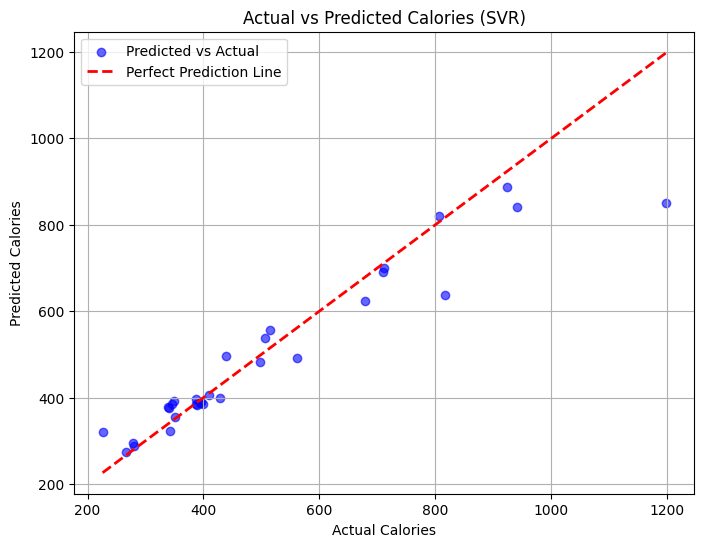

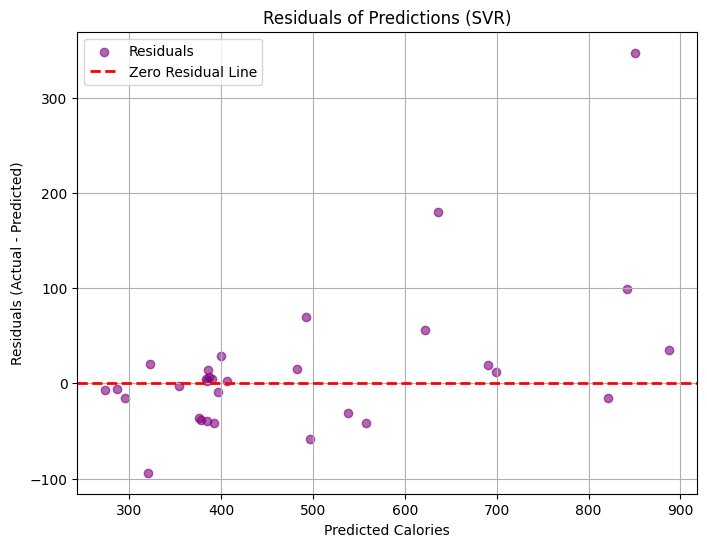

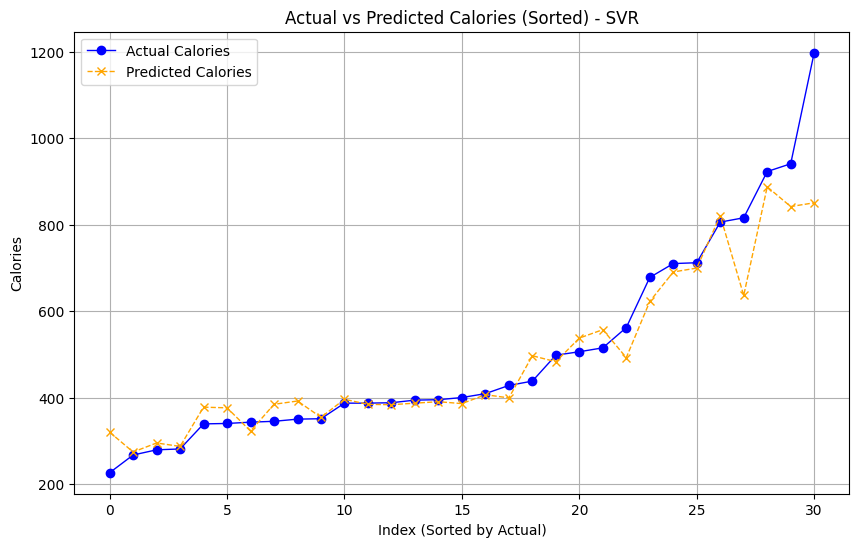

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Selecting features (independent variables) and target (dependent variable)
X_svr = filtered_metrics[['Distance (Raw)', 'Average Speed', 'Average Heart Rate (bpm)']]
y_svr = filtered_metrics['Calories']

# Step 1: Data Standardization
scaler = StandardScaler()
X_svr_scaled = scaler.fit_transform(X_svr)

# Step 2: Splitting Data into Training and Testing Sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr_scaled, y_svr, test_size=0.2, random_state=42)

# Step 3: Creating and Training the SVR Model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_svr, y_train_svr)

# Step 4: Making Predictions on the Test Set
y_pred_svr = svr_model.predict(X_test_svr)

# Step 5: Model Evaluation
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)

print("\nSVR Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared (R²): {r2_svr}")

# Step 6: Comparison of Actual vs Predicted Calories
comparison_svr = pd.DataFrame({'Actual': y_test_svr, 'Predicted': y_pred_svr})
print("\nComparison of Actual vs Predicted Calories:")
print(comparison_svr.head(20))

# Step 7: Visualizing Model Performance
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_svr, y_pred_svr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_svr.min(), y_test_svr.max()], [y_test_svr.min(), y_test_svr.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Calories (SVR)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.grid()
plt.show()

# Residual plot
residuals_svr = y_test_svr - y_pred_svr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_svr, residuals_svr, color='purple', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.title('Residuals of Predictions (SVR)')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid()
plt.show()

# Line plot for actual vs predicted values
comparison_svr_sorted = comparison_svr.sort_values(by='Actual')
plt.figure(figsize=(10, 6))
plt.plot(comparison_svr_sorted['Actual'].values, label='Actual Calories', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(comparison_svr_sorted['Predicted'].values, label='Predicted Calories', color='orange', marker='x', linestyle='--', linewidth=1)
plt.title('Actual vs Predicted Calories (Sorted) - SVR')
plt.xlabel('Index (Sorted by Actual)')
plt.ylabel('Calories')
plt.legend()
plt.grid()
plt.show()




## **Support Vector Regression (SVR) for Predicting Calories**
- **Objective**: To predict calories burned during runs based on other metrics such as `Distance`, `Average Speed`, and `Average Heart Rate`.
- **Use of Support Vector Regression (SVR)**: SVR is used here to capture the relationship between the features and target variable (`Calories`). SVR is suitable for situations where there is a need for capturing non-linear relationships in the data while maintaining flexibility. The kernel function used here (`rbf`) allows the model to adapt to non-linearity, potentially providing better predictions for complex data.

### Steps
1. **Feature Selection and Data Standardization**:
   - Selected features: `Distance`, `Average Speed`, and `Average Heart Rate`.
   - Standardized the features using `StandardScaler` to ensure that all metrics have the same scale, which is necessary for SVR as it is sensitive to the scale of input features.
2. **Splitting Data into Training and Testing Sets**:
   - The dataset was split into training (80%) and testing (20%) sets to build the model and evaluate its performance.
3. **Model Training**:
   - An SVR model with an `rbf` kernel was used with parameters `C=100`, `gamma=0.1`, and `epsilon=0.1`. These hyperparameters control the flexibility and fit of the SVR.
   - The model was trained using the training dataset to capture relationships between features and target variables.
4. **Model Evaluation**:
   - Evaluated model performance using `Mean Squared Error (MSE)` and `R-squared (R²)`. An `R²` value of approximately `0.88` indicates that the model explains about 88% of the variance in calories burned, showing a strong fit but slightly lower than other models tested.
   - Created a comparison table of actual vs predicted values to understand the quality of predictions.

### Findings, Patterns, and Insights from Plots
1. **Actual vs Predicted Calories**:
   - The scatter plot shows that most predicted points fall relatively close to the perfect prediction line, indicating a generally accurate model.
   - Some data points, particularly for higher calorie values, deviate from the perfect prediction line, which highlights instances where the model struggles to generalize effectively for larger values.
  
2. **Residuals of Predictions**:
   - The residual plot helps assess the error distribution in the predictions.
   - Most residuals are clustered around the zero line, which indicates that the model has no systematic bias.
   - However, there are several points with large positive residuals, particularly for higher predicted calorie values. These indicate significant under-predictions, suggesting that the model fails to predict accurately for high-intensity or high-calorie burns.

3. **Actual vs Predicted Calories**:
   - The line plot that sorts actual vs predicted values offers a detailed view of how the model predictions align with the real data.
   - The predicted values follow the trend of actual values fairly well for the lower and moderate calorie ranges, showing a good fit.
   - There are noticeable discrepancies at the extremes, where predictions deviate from the actual calories, indicating a need for potential model improvements for outliers or extreme cases.

### Overall
- **Model Performance**: The SVR model performed well, achieving an R² score of approximately `0.88`. This indicates that the model captures a significant portion of the variance in calorie burn but does not fully capture extreme variations. The `Mean Squared Error` also suggests some level of prediction error, which is more pronounced for higher calorie counts.
- **Under-Predictions for High Values**: There is a clear trend of under-prediction for higher calorie burns, as seen in both the scatter and residual plots. This implies that while the SVR model is effective for moderate-range predictions, it struggles with more extreme values, possibly due to non-linear effects that are not fully captured.
- **Improvements Needed for Extreme Cases**: To improve predictions for higher calorie values, the model could benefit from further tuning of hyperparameters or perhaps by using more training data, specifically focusing on high-intensity sessions. Alternatively, ensemble approaches or more complex models like Gradient Boosting may better handle non-linear dependencies in such data.
- **Balanced Predictive Power for Moderate Range**: Despite the under-performance at extremes, the model performs well for the typical calorie range, providing reliable predictions, making it useful for day-to-day workout sessions where calorie burn does not reach high extremes.



# **Time Series Forecasting of Distance and Speed for Performance Trends**

## Time Series Using Prophet and Evaluating Performance Metrics Of Forcating Distance and Speed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2bc6jh0/mp2crp23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2bc6jh0/zn2ooy3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97580', 'data', 'file=/tmp/tmp_2bc6jh0/mp2crp23.json', 'init=/tmp/tmp_2bc6jh0/zn2ooy3w.json', 'output', 'file=/tmp/tmp_2bc6jh0/prophet_modelt48erv2f/prophet_model-20241204073137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:31:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:37 - cmdstanpy - INFO - Chai

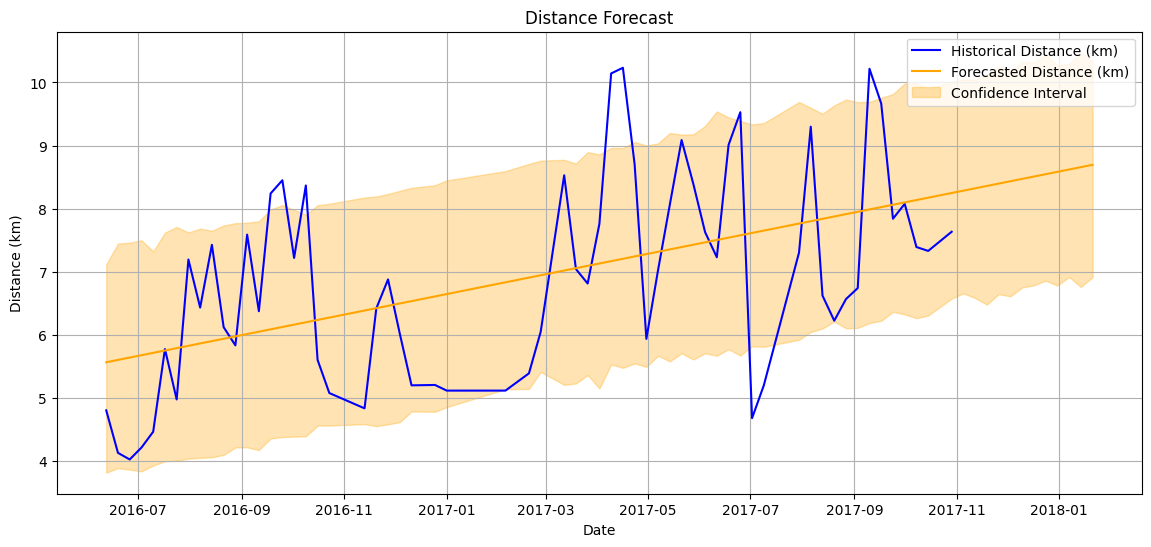

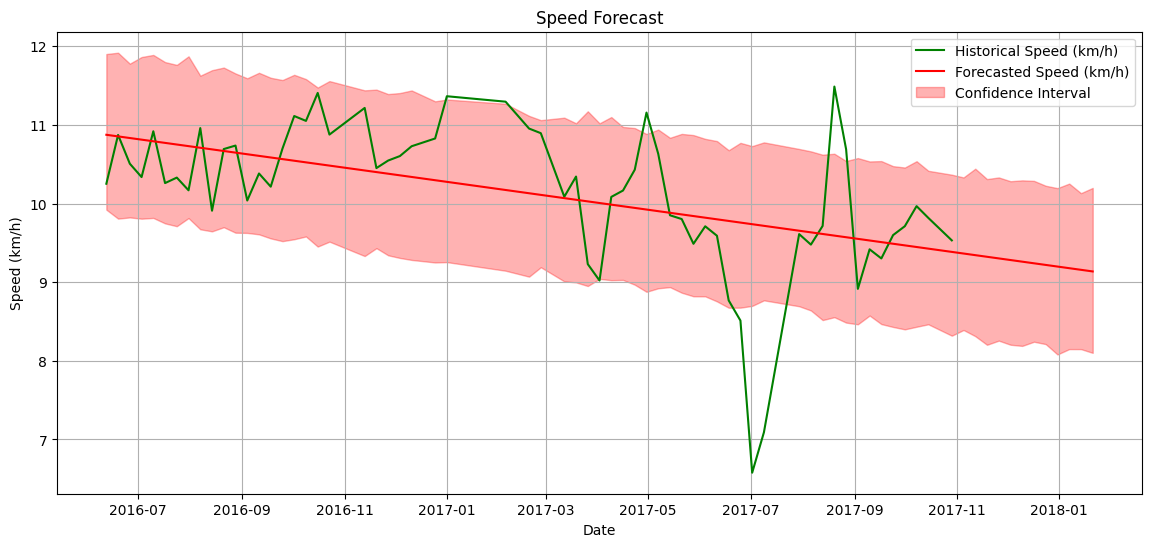


Distance Forecast Validation Metrics:
Mean Absolute Error (MAE): 1.10
Root Mean Squared Error (RMSE): 1.26

Speed Forecast Validation Metrics:
Mean Absolute Error (MAE): 0.47
Root Mean Squared Error (RMSE): 0.70


In [ ]:
# Import necessary libraries
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load and preprocess the dataset
file_path = '/content/Fixed_cleaned_activities.csv'
activity_data = pd.read_csv(file_path)

# Convert the timestamp column to datetime format and set it as the index
activity_data['Timestamp'] = pd.to_datetime(activity_data['Begin Timestamp'], dayfirst=True)
activity_data.set_index('Timestamp', inplace=True)

# Select key metrics and filter out extreme values (outliers)
data_metrics = activity_data[['Distance (Raw)', 'Average Speed']].copy()
data_metrics = data_metrics[
    (data_metrics['Distance (Raw)'] < 50) &  # Remove extreme distance values
    (data_metrics['Average Speed'] < 15)    # Remove extreme speed values
]

# Apply smoothing using a rolling average to reduce noise
data_metrics['Rolling Distance'] = data_metrics['Distance (Raw)'].rolling(window=3).mean()
data_metrics['Rolling Speed'] = data_metrics['Average Speed'].rolling(window=3).mean()

# FIlter data after May 2016 for cleaner analysis
filtered_data = data_metrics.loc[data_metrics.index > '2016-05-01']

# Aggregate data into weekly averages for consistent forecasting intervals
weekly_metrics = filtered_data[['Rolling Distance', 'Rolling Speed']].resample('W').mean().dropna()

# Define a utility function to format data for Prophet
def format_for_forecasting(input_data, target_column):
    formatted_data = input_data.reset_index()[['Timestamp', target_column]]
    formatted_data.rename(columns={'Timestamp': 'ds', target_column: 'y'}, inplace=True)
    return formatted_data

# Define a utility function to train and forecast with Prophet
def train_and_forecast(data, periods=12, interval='W'):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods, freq=interval)
    forecast = model.predict(future)
    return model, forecast

# Prepare and forecast for distance
distance_input = format_for_forecasting(weekly_metrics, 'Rolling Distance')
distance_model, distance_forecast = train_and_forecast(distance_input)

# Prepare and forecast for speed
speed_input = format_for_forecasting(weekly_metrics, 'Rolling Speed')
speed_model, speed_forecast = train_and_forecast(speed_input)

# Visualization function for forecasts
def visualize_forecast(actual, forecast, title, y_label, actual_color, forecast_color):
    plt.figure(figsize=(14, 6))
    plt.plot(actual.index, actual.iloc[:, 0], label=f'Historical {y_label}', color=actual_color)
    plt.plot(forecast['ds'], forecast['yhat'], label=f'Forecasted {y_label}', color=forecast_color)
    plt.fill_between(
        forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
        color=forecast_color, alpha=0.3, label='Confidence Interval'
    )
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

# Plot forecasts
visualize_forecast(weekly_metrics[['Rolling Distance']], distance_forecast, 'Distance Forecast', 'Distance (km)', 'blue', 'orange')
visualize_forecast(weekly_metrics[['Rolling Speed']], speed_forecast, 'Speed Forecast', 'Speed (km/h)', 'green', 'red')

# Function to calculate model performance metrics
def evaluate_forecast(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    return mae, rmse

# Evaluate Distance Forecast
validation_distance_actual = distance_input[-12:]
distance_predictions = distance_forecast.set_index('ds').loc[validation_distance_actual['ds'], 'yhat']
distance_mae, distance_rmse = evaluate_forecast(validation_distance_actual['y'], distance_predictions)

print("\nDistance Forecast Validation Metrics:")
print(f"Mean Absolute Error (MAE): {distance_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {distance_rmse:.2f}")

# Evaluate Speed Forecast
validation_speed_actual = speed_input[-12:]
speed_predictions = speed_forecast.set_index('ds').loc[validation_speed_actual['ds'], 'yhat']
speed_mae, speed_rmse = evaluate_forecast(validation_speed_actual['y'], speed_predictions)

print("\nSpeed Forecast Validation Metrics:")
print(f"Mean Absolute Error (MAE): {speed_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {speed_rmse:.2f}")



## **Time Series Forecasting of Distance and Speed**
- **Objective**: To forecast future trends in running performance metrics, specifically `Distance` and `Speed`, based on historical data using Prophet. This allows us to predict future trends and assess long-term improvements or declines in athlete performance.
- **Use of Time Series Analysis with Prophet**: Prophet, a forecasting model developed by Facebook, is utilized here for its capability to capture seasonal patterns and provide reliable future predictions. It is particularly well-suited for time series data that may contain fluctuations and irregularities like workout metrics.

### Steps

1. **Data Preparation and Preprocessing**:
   - **Loading and Filtering Data**: Loaded the running dataset and converted the timestamp column to datetime format for time series analysis. Outliers, such as extreme values in distance (`>50 km`) and speed (`>15 km/h`), were removed to ensure data consistency.
   - **Smoothing and Aggregation**: Applied a rolling average with a window of 3 to smooth the data and remove short-term fluctuations. Aggregated the metrics on a weekly basis to capture broader trends, which is particularly important for time series forecasting to handle seasonality and ensure stability.

2. **Training Prophet Models**:
   - **Distance Forecasting**: Used the preprocessed weekly rolling average of the `Distance` metric as the input for the Prophet model, trained it, and then forecasted the next 12 weeks to identify upcoming trends in running distances.
   - **Speed Forecasting**: Similarly, applied the Prophet model to the `Rolling Speed` metric to forecast average running speed for the upcoming 12 weeks.

3. **Model Evaluation**:
   - Calculated performance metrics including `Mean Absolute Error (MAE)` and `Root Mean Squared Error (RMSE)` to validate the accuracy of the forecasts.
   - **Distance Forecast Validation Metrics**:
     - MAE: `1.10` and RMSE: `1.26`, indicating a reasonably accurate forecast with minimal deviations.
   - **Speed Forecast Validation Metrics**:
     - MAE: `0.47` and RMSE: `0.70`, demonstrating good prediction accuracy with smaller errors, reflecting reliability in forecasting speed trends.

### Findings, Patterns, and Insights from the Plots

1. **Distance Forecast**:
   - **Historical and Predicted Trends**: The blue line represents historical running distances, and the orange line represents the forecasted trend.
   - **Insights**:
     - The forecast indicates a **gradual increase in distance** over the upcoming weeks, suggesting improvement or an increase in training intensity.
     - The confidence interval (shaded region) shows an increasing range, implying greater uncertainty in predicting higher values. This is expected as forecasting further into the future inherently introduces more variability.
   - **Seasonality and Variability**:
     - Historical data shows significant variability in distances covered, which indicates variations in training sessions. The Prophet model projects a steady trend without extreme peaks or drops, smoothing out the sharp fluctuations seen in the historical data.

2. **Speed Forecast**:
   - **Historical and Predicted Trends**: The green line represents historical speed values, while the red line represents the forecasted trend.
   - **Insights**:
     - The forecast shows a **slight decline in average speed** over time, possibly indicating a trend towards slower running paces or longer endurance sessions with reduced speeds.
     - The confidence interval for speed forecasts is also widening over time, similar to distance forecasts, suggesting increasing uncertainty in predicting future values.
   - **Historical Variability**:
     - The sharp dips in historical speed values may indicate difficult running conditions or fatigue. However, the forecast smooths these variations, providing an overall declining trend, which could indicate a shift in focus towards endurance over speed in training sessions.

3. **Overall Performance Metrics**:
   - **Distance Metrics**: The relatively low values for MAE (`1.10`) and RMSE (`1.26`) indicate that the model's prediction of running distance is fairly accurate, capturing the general trend effectively despite the occasional high variability in the historical data.
   - **Speed Metrics**: The even lower MAE (`0.47`) and RMSE (`0.70`) for speed indicate a high level of accuracy, with the model effectively capturing the trends for the average speed metric. This reflects a consistent pattern in the runner's speed, making it easier for the model to forecast future values.

### Key Insights from the Time Series Analysis
- **Distance is Expected to Gradually Increase**: The distance forecast indicates an upward trend, suggesting that the athlete may be increasing their training load or focusing on covering longer distances.
- **Average Speed Shows a Gradual Decline**: The speed forecast shows a slight decline, which might suggest a training shift from speed-focused sessions towards longer endurance sessions. This could indicate the athlete's preference for endurance over high-intensity speed training, or a potential reduction in overall pace due to longer distances.
- **Forecast Uncertainty**: Both forecasts show increasing confidence intervals, indicating greater uncertainty as the forecast moves further into the future. This is a common feature in time series forecasting, particularly with fluctuating data.
- **Balanced Training Interpretation**: The combination of increasing distances and decreasing speed suggests a strategic shift in training — likely towards building endurance rather than focusing purely on speed.

### Use of Prophet for Performance Trends
- **Utility of Prophet**: Prophet is particularly useful in this context due to its ability to handle seasonality and irregularities in time series data. Its built-in handling of holidays or outliers makes it well-suited for real-world running data, where sessions may vary greatly in distance and intensity.
- **Practical Benefits**: Using time series forecasting helps in planning future training programs by providing actionable insights into likely performance trends. This can aid athletes or coaches in decision-making processes, allowing them to modify training intensity, volume, or focus areas to meet upcoming goals or adjust to trends.
